# **Tugas 3**

In [1]:
# nama : yusril aminuddin
# nim : 201910370311366
# kelas : cbir sela 2023
# dosen pengampuh : bapak yufis azhar, S.Kom., M.Kom.
# penugasan : ketiga

In [2]:
# ============
# INSTRUCTIONS
# ============
# Buatlah sebuah sistem yang dapat menghitung jarak antara image query dengan image dataset (yg sudah Anda kumpulkan di Tugas 2).
# Gunakan metode pengukuran jarak yang telah Anda pelajari, bisa euclidean, manhattan, minkowski, atau yang lain.
# Kumpulkan url google colab dari pekerjaan Anda.

In [3]:
# import library yang dibutuhkan
from google.colab import drive
import os
import pandas as pd
from google.colab import files
import glob
from skimage.io import imread, imshow
from PIL import Image
import numpy as np
from scipy.spatial import distance

In [4]:
# mount GDrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# initial variable for dataset folder and resized folder
originalDataset = "/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 3/dataset/"
queryDataset = "/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 3/query/"
resizedDataset = "/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 3/resized/"

In [6]:
# change directory to original dataset and show current path
os.chdir(originalDataset)
%pwd

'/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 3/dataset'

In [7]:
# read csv as dataframe
dataset_df = pd.read_csv('result.csv')

# and show
dataset_df

,name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,kiwi,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,...,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333
1,pineapple,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,...,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667
2,grape,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
3,strawberry,19.000000,19.000000,19.000000,18.000000,18.000000,18.000000,17.000000,17.000000,20.000000,...,91.666667,91.666667,92.666667,92.666667,91.000000,91.000000,95.666667,96.666667,97.666667,98.666667
4,berry,192.000000,193.000000,194.000000,195.000000,196.000000,198.000000,199.000000,199.000000,201.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,197.666667,197.666667,197.666667,197.666667
5,banana,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,184.666667,...,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667
6,papaya,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,140.333333,...,124.666667,123.666667,124.000000,123.000000,123.000000,123.000000,122.000000,122.000000,122.000000,122.000000
7,avocado,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,213.333333,...,198.333333,199.333333,199.333333,198.333333,198.333333,197.333333,196.666667,196.666667,196.666667,196.666667
8,watermelon,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,...,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667
9,orange,89.000000,89.666667,89.666667,90.333333,91.000000,92.000000,92.666667,92.666667,93.666667,...,89.000000,88.000000,87.333333,86.666667,86.000000,84.666667,83.000000,82.000000,81.000000,79.666667


In [8]:
# change directory to query dataset and show current path
os.chdir(queryDataset)
%pwd

'/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 3/query'

In [9]:
# make sure query folder is empty
%rm -rf *

# unggah citra
uploaded = files.upload()

Saving query.jpg to query.jpg


In [10]:
# save query images to array ended with .jpg extensions
images = [imread(file) for file in glob.glob(queryDataset + "*")]

((1920, 1920, 3), <matplotlib.image.AxesImage at 0x7ebacf63a260>)

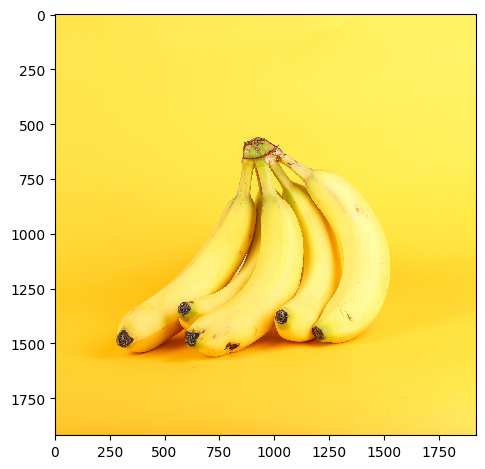

In [11]:
# check first original image and its shape
images[0].shape, imshow(images[0])

In [12]:
# change directory to resized dataset and show current path
os.chdir(resizedDataset)
%pwd

'/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 3/resized'

In [13]:
# make sure resized folder is empty
%rm -rf *

# reshape each image to 100 x 100 and extract features from each pixel
query_names = []

for image in os.listdir(queryDataset):
  name, extension = os.path.splitext(image)
  img = Image.open(queryDataset + image)
  img = img.resize((100, 100))
  img.save(name + extension)
  query_names.append(name)
  print(img)

<PIL.Image.Image image mode=RGB size=100x100 at 0x7EBACF63A7A0>


In [14]:
# save resized images to array ended with .jpg extensions
resized_images = [imread(file) for file in glob.glob(resizedDataset + "*")]

((100, 100, 3), <matplotlib.image.AxesImage at 0x7ebad05edf30>)

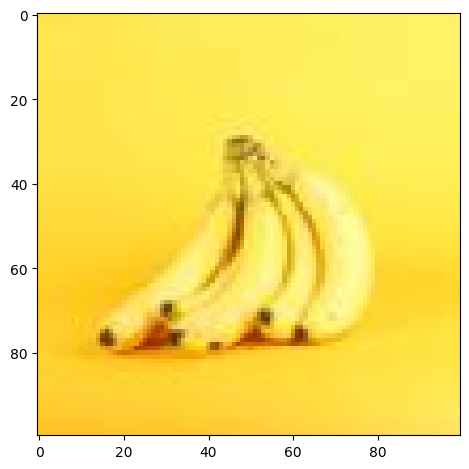

In [15]:
# check first resized image and its shape, for comparasion
resized_images[0].shape, imshow(resized_images[0])

In [16]:
# extract Mean Pixel Value of Channels
query_matrix = np.zeros((100, 100))
query_df = pd.DataFrame()

# code from example, additional with loop of resized_images
for image in resized_images:
  for i in range(0, image.shape[0]):
      for j in range(0, image.shape[1]):
          query_matrix[i][j] = ((int(image[i, j, 0]) + int(image[i, j, 1]) + int(image[i, j, 2]))/3)

  # get feature
  features = np.reshape(query_matrix, (100 * 100))

  # initial each feature as dataframe transposed
  raw_query_df = pd.DataFrame(features).T

  # save to final dataframe
  query_df = query_df.append(raw_query_df, ignore_index=True)

 # add name to each
query_df.insert(loc=0, column='name', value=query_names)

<ipython-input-16-a93cd3e5b487>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  query_df = query_df.append(raw_query_df, ignore_index=True)


In [17]:
# validate query with show
query_df

,name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,query,186.666667,186.666667,186.666667,186.666667,186.666667,186.666667,186.666667,186.666667,187.666667,...,187.666667,187.666667,187.666667,188.666667,188.666667,188.333333,190.0,190.0,190.0,191.0


In [18]:
# validate dataset with show
dataset_df

,name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,kiwi,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,...,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333
1,pineapple,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,...,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667
2,grape,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
3,strawberry,19.000000,19.000000,19.000000,18.000000,18.000000,18.000000,17.000000,17.000000,20.000000,...,91.666667,91.666667,92.666667,92.666667,91.000000,91.000000,95.666667,96.666667,97.666667,98.666667
4,berry,192.000000,193.000000,194.000000,195.000000,196.000000,198.000000,199.000000,199.000000,201.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,197.666667,197.666667,197.666667,197.666667
5,banana,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,184.666667,...,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667
6,papaya,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,140.333333,...,124.666667,123.666667,124.000000,123.000000,123.000000,123.000000,122.000000,122.000000,122.000000,122.000000
7,avocado,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,213.333333,...,198.333333,199.333333,199.333333,198.333333,198.333333,197.333333,196.666667,196.666667,196.666667,196.666667
8,watermelon,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,...,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667
9,orange,89.000000,89.666667,89.666667,90.333333,91.000000,92.000000,92.666667,92.666667,93.666667,...,89.000000,88.000000,87.333333,86.666667,86.000000,84.666667,83.000000,82.000000,81.000000,79.666667


In [19]:
# calculate the euclidean distance between query and dataset
image_distances = {}

for index, value in dataset_df.iterrows():

  # get euclidean distance from query and dataset [1:] indicate without "name"
  output_distance = distance.euclidean(query_df.iloc[0][1:], value[1:])

  # save distance
  image_distances[value["name"]] = output_distance

In [20]:
# find the closest match in the image_distances
closest_match = min(image_distances, key=image_distances.get)
closest_distance = image_distances[closest_match]

In [21]:
# title
print("Euclidean Distance Calculation System\n")

# show calculated distances
for key, value in image_distances.items():

  # show iteration key and value
  print(f"Distance {query_names[0]} to {key} is {value}")

# additional description
print(f"\nClosest match to {query_names[0]} is {closest_match} with a distance of {closest_distance}")

Euclidean Distance Calculation System

Distance query to kiwi is 4584.885312996689
Distance query to pineapple is 7087.120838378494
Distance query to grape is 6972.86912094142
Distance query to strawberry is 14547.086577349372
Distance query to berry is 4139.600047777064
Distance query to banana is 2238.385603757994
Distance query to papaya is 5390.244665648744
Distance query to avocado is 3642.669305147943
Distance query to watermelon is 6610.596174156903
Distance query to orange is 7656.928228009643

Closest match to query is banana with a distance of 2238.385603757994
